#SUPPORT VECTOR MACHINE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
#Load the dataset
df = pd.read_csv("mushroom.csv")

In [ ]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [ ]:
df.head(10)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
5,389,convex,grooves,pink,no,spicy,attached,crowded,broad,orange,...,universal,white,one,sheathing,white,scattered,woods,poisonous,4.337043,16.189338
6,330,bell,smooth,brown,no,anise,free,distant,broad,buff,...,partial,white,two,flaring,green,scattered,leaves,poisonous,12.702359,24.662015
7,98,conical,fibrous,white,yes,none,notched,close,narrow,black,...,partial,brown,one,large,orange,several,woods,poisonous,11.963690,19.408506
8,597,conical,grooves,green,yes,pungent,attached,crowded,narrow,buff,...,universal,yellow,two,evanescent,chocolate,solitary,woods,edible,14.272490,13.260537
9,16,convex,scaly,brown,yes,almond,attached,crowded,broad,red,...,partial,white,none,zone,green,clustered,leaves,poisonous,11.842597,4.216489


In [ ]:
df.tail(5)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199
1999,1073,convex,scaly,yellow,yes,pungent,descending,close,narrow,purple,...,partial,white,two,large,white,numerous,urban,poisonous,13.066414,21.056642


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [ ]:
df.nunique()

,0
Unnamed: 0,976
cap_shape,5
cap_surface,4
cap_color,9
bruises,2
odor,9
gill_attachment,4
gill_spacing,3
gill_size,2
gill_color,12


In [ ]:
df['class'].value_counts()

,count
class,
poisonous,1400
edible,600


#Visualize Feature Distributions

/tmp/ipython-input-11-572440623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


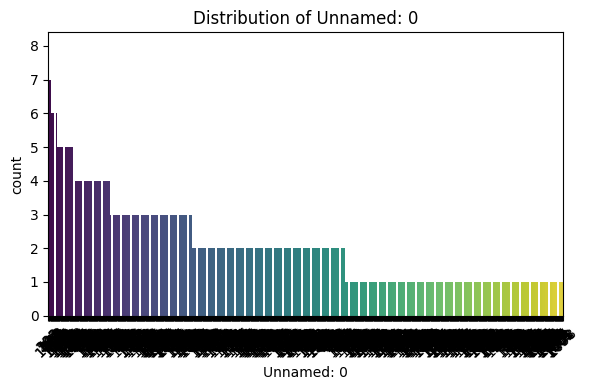

/tmp/ipython-input-11-572440623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


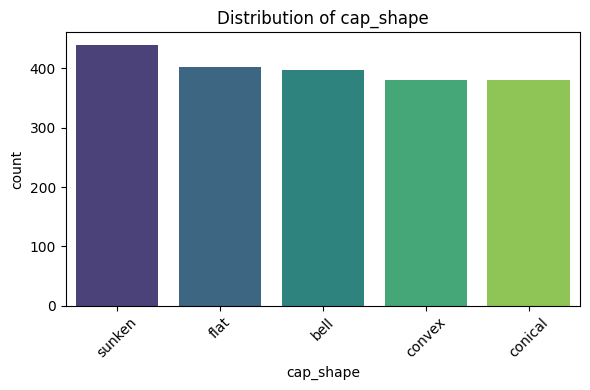

/tmp/ipython-input-11-572440623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


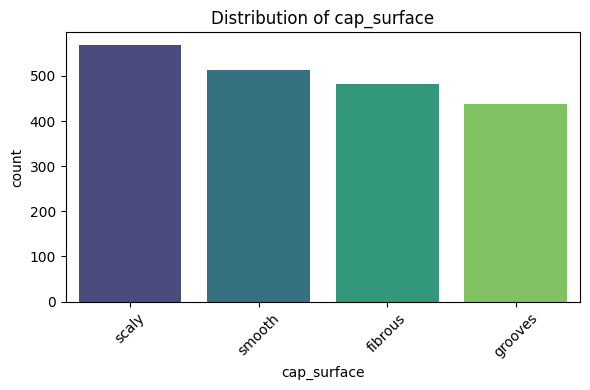

/tmp/ipython-input-11-572440623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


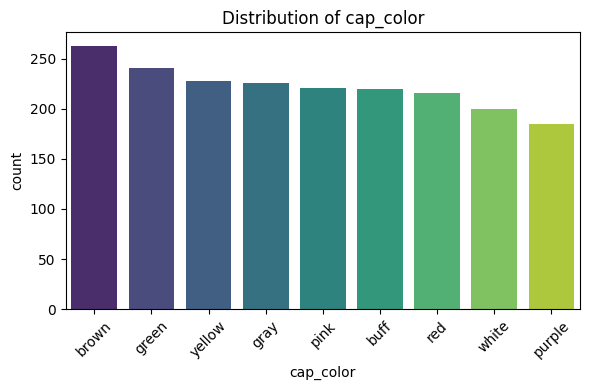

/tmp/ipython-input-11-572440623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


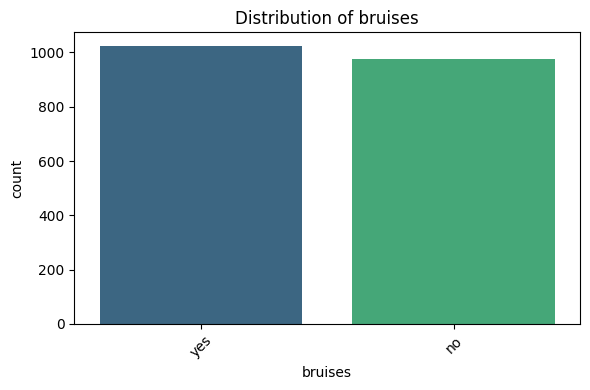

/tmp/ipython-input-11-572440623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


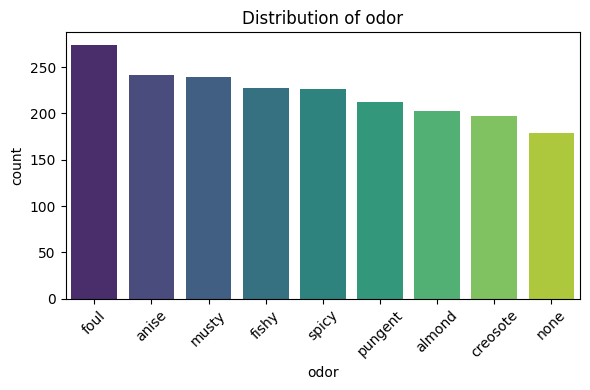

In [ ]:
# Plot countplot for selected features
for col in df.columns[:6]:  # first 6 features as example
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df_encoded = df.apply(LabelEncoder().fit_transform)

In [ ]:
df_encoded

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,283,680
1996,885,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,335,521
1997,205,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,859,438
1998,329,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,679,320


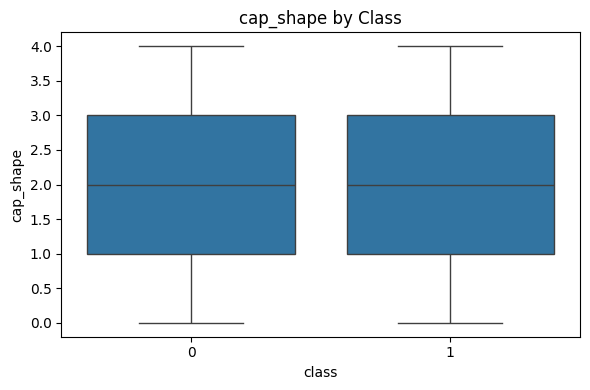

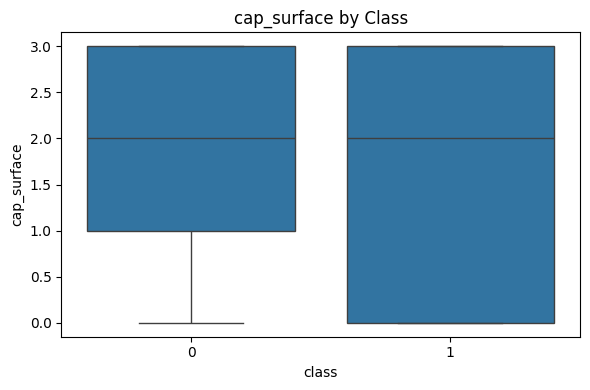

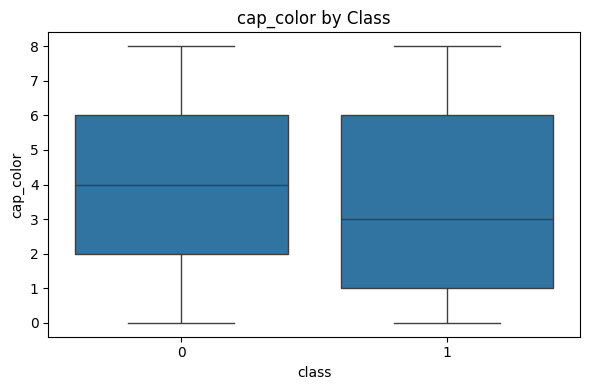

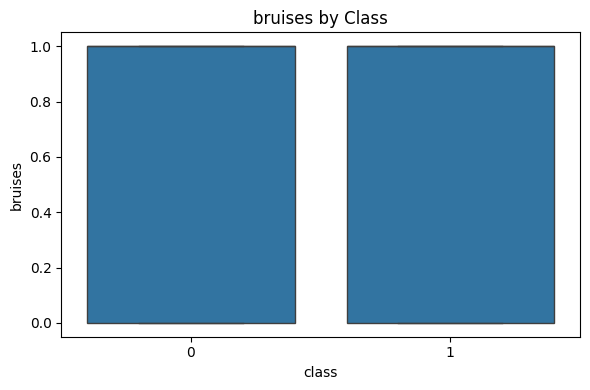

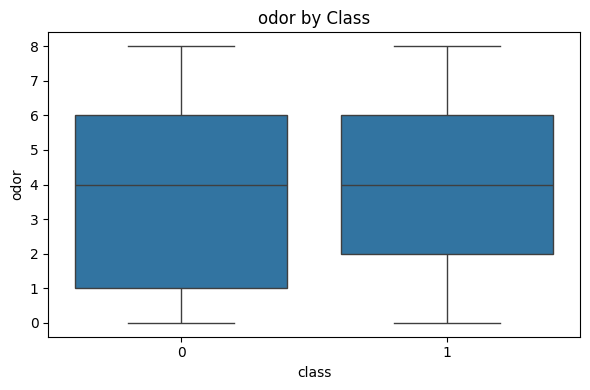

In [ ]:
# Boxplot for visualizing distribution of encoded features across 'class'
for col in df_encoded.columns[1:6]:  # skip target class
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, data=df_encoded)
    plt.title(f'{col} by Class')
    plt.tight_layout()
    plt.show()

In [ ]:
#Encode Data to Numeric
df_encoded = df.apply(LabelEncoder().fit_transform)


In [ ]:
df_encoded

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,283,680
1996,885,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,335,521
1997,205,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,859,438
1998,329,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,679,320


In [ ]:
#Create Correlation Matrix
corr_matrix = df_encoded.corr()

In [ ]:
corr_matrix

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.075763,-0.018949,0.023832,-0.046098,-0.012166,-0.005352,0.047559,-0.022678,0.038787,...,0.019621,-0.049108,-0.066561,0.022132,-0.002575,0.020003,0.051963,0.005742,-0.001660,0.051861
cap_shape,0.075763,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.023586,0.038942
cap_surface,-0.018949,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043168,0.016084
cap_color,0.023832,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.043899,-0.000427
bruises,-0.046098,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.066449,-0.045774
odor,-0.012166,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.012637,-0.054402
gill_attachment,-0.005352,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.015984,-0.041098
gill_spacing,0.047559,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.014766,0.030303
gill_size,-0.022678,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.001054,-0.068738
gill_color,0.038787,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026476,0.004822


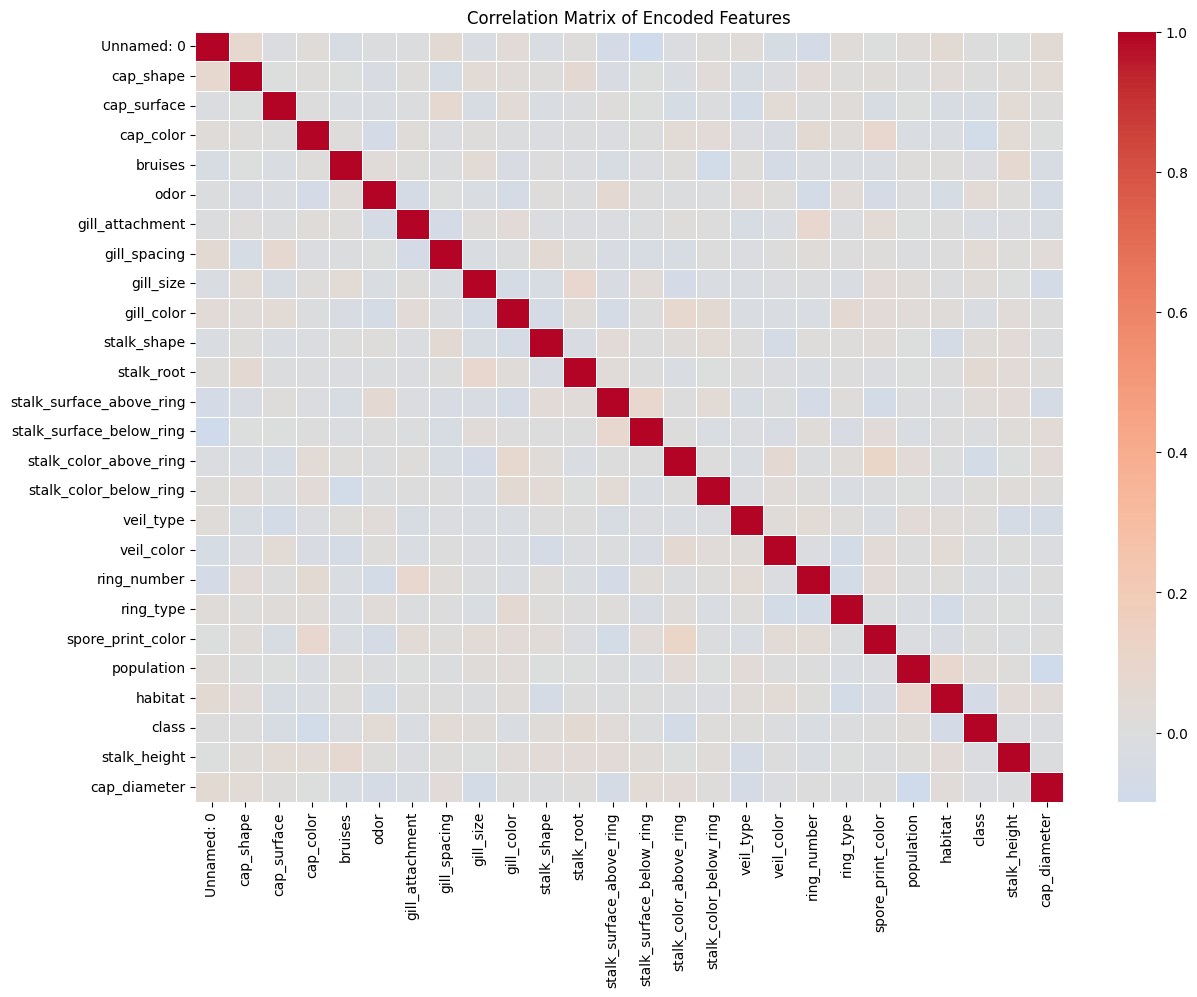

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Encoded Features")
plt.show()

In [ ]:
#Focus on correlation with target
target_corr = corr_matrix['class'].drop('class').sort_values(ascending=False)
print("Top positively correlated features with 'class':")
print(target_corr.head())


Top positively correlated features with 'class':
stalk_root                  0.054233
gill_spacing                0.046505
odor                        0.039536
stalk_surface_above_ring    0.031007
stalk_shape                 0.024023
Name: class, dtype: float64


#Data Preprocessing

In [ ]:
#Train-Test Split
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,916,190
1,786,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,128,750
2,246,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,537,281
3,221,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,234,829
4,630,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,4,0,1,1,2,6,0,1,283,680
1996,885,4,2,5,1,5,0,2,1,9,...,4,0,2,1,7,8,2,5,335,521
1997,205,2,1,3,1,3,3,0,1,7,...,6,0,0,2,1,8,0,6,859,438
1998,329,0,3,7,0,7,2,0,1,6,...,5,1,3,1,0,1,5,6,679,320


In [ ]:
y

,class
0,1
1,0
2,1
3,1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [ ]:
X_train, X_test, y_train, y_test

(      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
 968          894          4            0          4        0     7   
 240          330          3            0          6        1     6   
 819          939          1            1          0        0     3   
 692          261          4            2          2        1     4   
 420          524          4            3          7        1     5   
 ...          ...        ...          ...        ...      ...   ...   
 1130         480          4            2          8        0     1   
 1294         951          1            1          6        1     4   
 860            2          3            3          0        0     4   
 1459         839          4            1          8        0     1   
 1126         601          3            3          6        1     0   
 
       gill_attachment  gill_spacing  gill_size  gill_color  ...  \
 968                 2             2          1           6  ...   
 240      

#Data Visualization

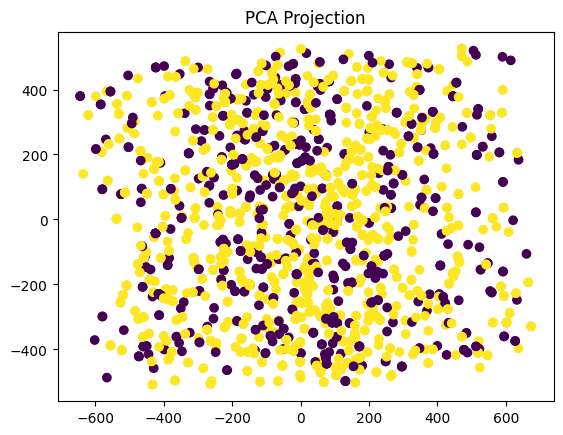

In [ ]:
#PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA Projection")
plt.show()


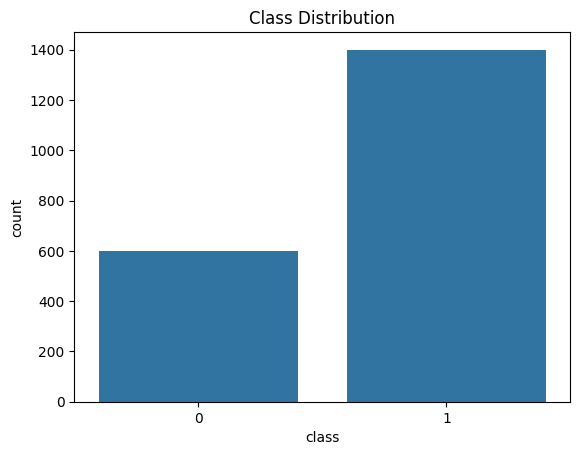

In [ ]:
#Visualize Class Balance
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


#SVM Implementation

In [ ]:
#Train an SVM Model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')  # Start with linear
svm_model.fit(X_train, y_train)



SVC(kernel='linear')

#Make Predictions and Evaluate

In [ ]:
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Visualize SVM Results


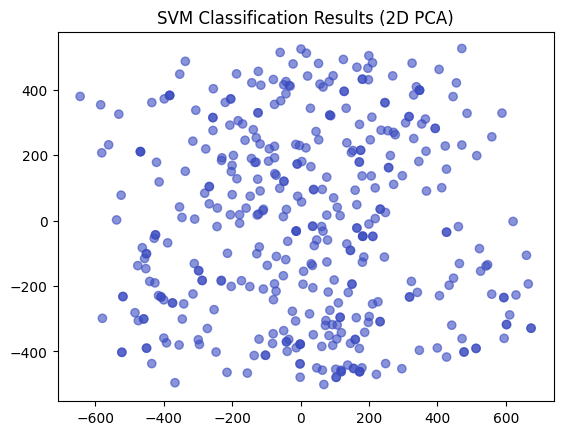

In [ ]:
X_test_pca = pca.transform(X_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6)
plt.title("SVM Classification Results (2D PCA)")
plt.show()


#Parameter Tuning and Optimization

In [ ]:
for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel, C=1.0)
    model.fit(X_train, y_train)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", model.score(X_test, y_test))



Kernel: linear
Accuracy: 0.6675

Kernel: poly
Accuracy: 0.6675

Kernel: rbf
Accuracy: 0.6675


In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, cv=2)     # cv=5 not supporting and it's takes long time
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [ ]:
grid

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

#Comparison and Analysis

In [ ]:
#1.Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

#What are kernels in SVM?
  #Kernels decide how the SVM draws the line or curve to separate the classes (edible vs poisonous mushrooms).

 #Linear Kernel
    #Tries to draw a straight line (or hyperplane).
    #Works well if the data is simple and can be separated with a line.

   #In Mushroom Dataset:
    #The data is not linearly separable, so this kernel may not perform the best.

 #Polynomial Kernel
   #Draws a curved boundary (like a U-shape or S-shape).
   #Good for data with more complex patterns.

   #In Mushroom Dataset:
    #Performs better than linear, because it can capture relationships between features.

 #RBF (Radial Basis Function) Kernel
   #Draws a flexible curved boundary.
   #It tries to fit the best possible curve, even in complicated cases.

    #In Mushroom Dataset:
      #This kernel performs the best because the data has non-linear patterns



In [ ]:
#2. Analyze SVM strengths and weaknesses (for Mushroom dataset)
   #Strengths:
     # Mushroom data is fully categorical and easily encoded.
     # Clear separation exists between edible and poisonous classes.
     # SVM performs well when data is clean and high-dimensional.
     # SVM gives high accuracy, especially with RBF or polynomial kernels.

   #Weaknesses:
    # SVM is not explainable – hard to know why it made a decision.
    # Slow on large datasets.

    # Parameter tuning (like C and gamma) is needed for best performance.

    # Doesn’t work well when classes overlap a lot or data has noise

In [ ]:
#3.Discuss practical implications of SVM in real-world classification tasks.

  #Practical implications:
    #SVM is ideal for datasets with clear margins of separation and can generalize well with appropriate tuning.
    #For real-time mushroom classification apps, SVM with RBF kernel can provide high precision to avoid misclassifying poisonous mushrooms.

